In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, glob
import microwave_toolbox.notebook.epsmu as epsmu
import skrf

In [3]:
epsmu.example_airline_and_sample('KBand')

using airline: KBand
line = {
    "type"             : "waveguide",
    "calibration"      : "TRL_WR42",
    "length"           : [0.0038099999999999996, 2.54e-05],
    "D_large"          : [0.010667999999999999, 2.54e-05],
    "D_small"          : [0.004318, 2.54e-05]
    }
sample = {
    "name"             : "a sample",
    "port1 offset"     : "auto",
    "thickness"        : [1.0e-3, 20.0e-6],
    "D_large"          : [0.010667999999999999, 2.54e-05],
    "D_small"          : [0.004318, 2.54e-05],
    "airgap correction": 'approximate', # 'exact', 'none'
    "electrical length": 0
    }



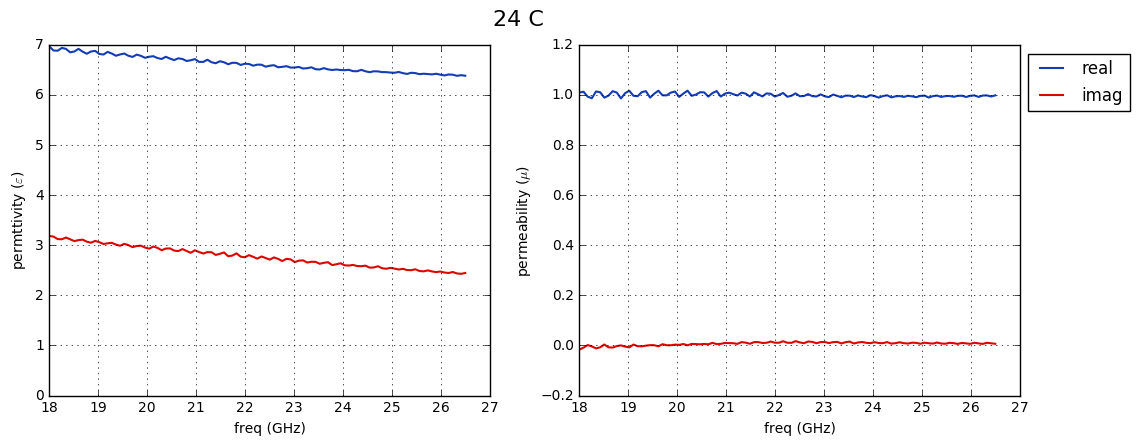

In [4]:
line = {
    "type"             : "waveguide",
    "calibration"      : "TRL_WR42",
    "length"           : [0.00459, 2.54e-05],
    "D_large"          : [0.010668, 2.54e-05],
    "D_small"          : [0.004318, 2.54e-05]
    }
sample = {
    "name"             : "a sample",
    "port1 offset"     : "auto",
    "thickness"        : [0.96e-3, 20.0e-6],
    "D_large"          : [0.010668, 2.54e-05],
    "D_small"          : [0.004318, 2.54e-05],
    "airgap correction": 'none', # 'exact', 'none'
    "electrical length": 0
    }

ntwk_24 = epsmu.get_s2p('CuO_s2p/dut_24.5.s2p')
meas_24 = epsmu.BakerJarvis(ntwk_24, (line, sample), name="24 C")
meas_24.plot_epsmu()

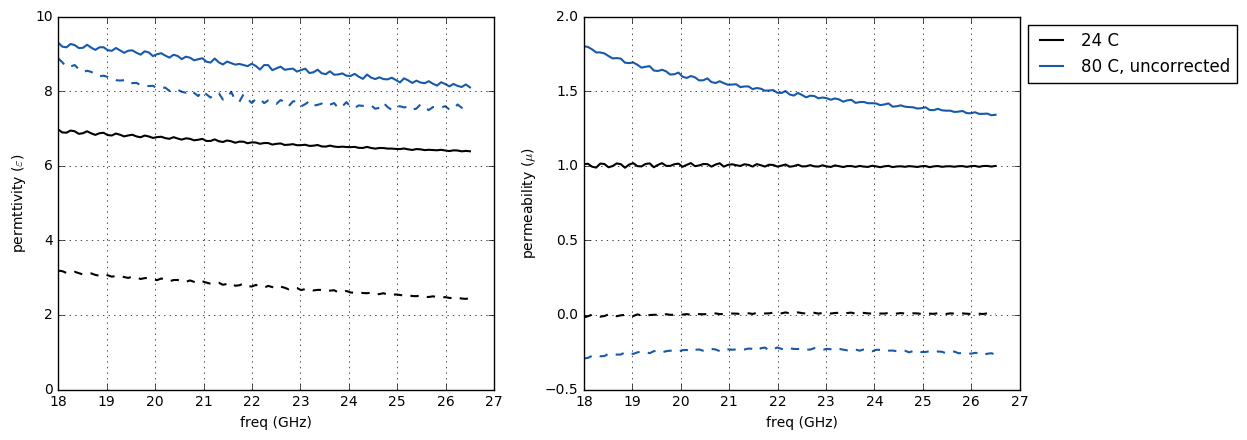

In [5]:
ntwk_80 = epsmu.get_s2p('CuO_s2p/dut_80.s2p')
meas_80 = epsmu.BakerJarvis(ntwk_80, (line, sample), name="80 C, uncorrected")

epsmu.compare_epsmu(meas_24, meas_80)

In [6]:
raw = skrf.read_all_networks('CuO_s2p/')

In [7]:
cal = skrf.calibration.TRL(ideals=None, measured=[raw['thru_80'], raw['reflect_80'], raw['line_80']])

C:\Coding\PythonPackageLinks\skrf\calibration\calibration.py:2059: UserWarning: No switch terms provided
  warn('No switch terms provided')


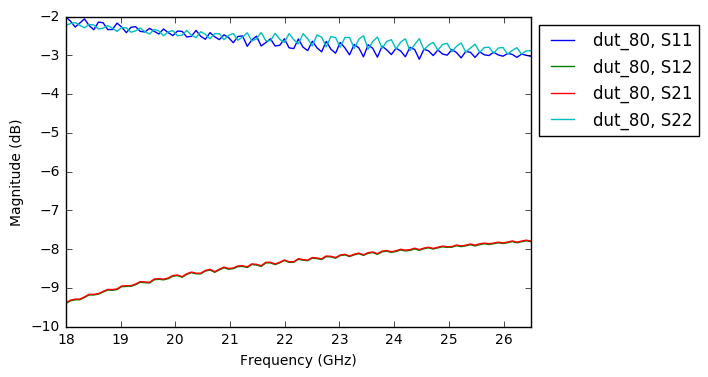

In [8]:
dut1 = cal.apply_cal(raw['dut_80'])
dut1.plot_s_db(); legend(loc="upper left", bbox_to_anchor=(1,1))

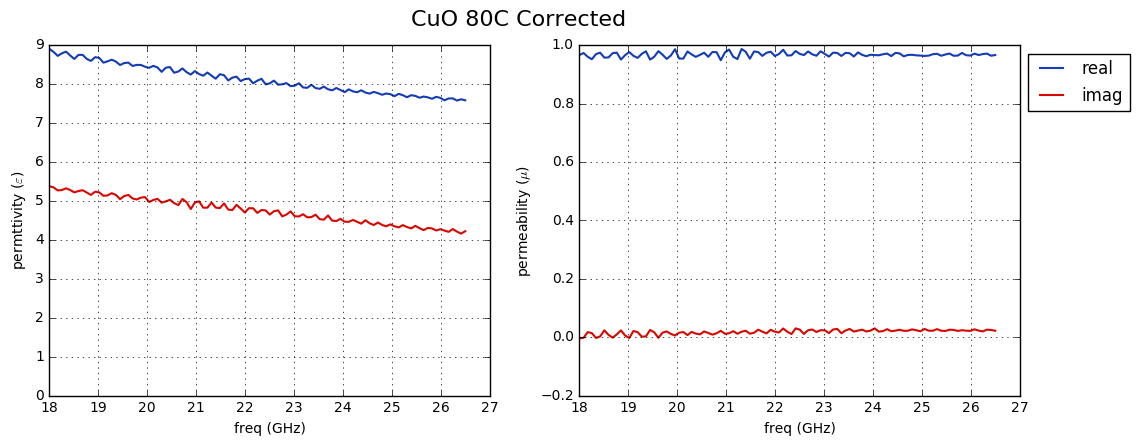

In [9]:
meas_trl = epsmu.BakerJarvis(dut1, (line, sample), name="CuO 80C Corrected")
meas_trl.plot_epsmu()

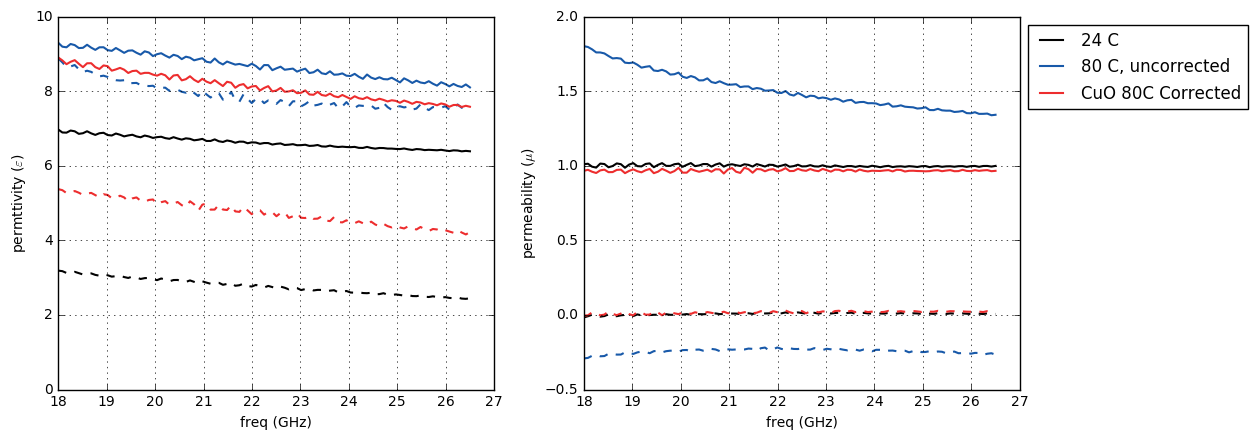

In [10]:
epsmu.compare_epsmu(meas_24, meas_80, meas_trl)

In [11]:
meas_24.save_measurement("CuO room temp.epsmu")
meas_80.save_measurement("CuO 80C not corrected.epsmu")
meas_trl.save_measurement("CuO 80C corrected.epsmu")